<a href="https://colab.research.google.com/github/jnqeras/ARC/blob/master/annotationProjectCONAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción

# **Set-up**

In [1]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import unittest
from typing import List, Set, Tuple
from google.colab import output

random.seed(0)

In [2]:
# Defining constants.

# Number of hate speech messajes in HS (every annotator will have to annotate the same set HS).
SIZE_OF_HS = 10
NUMBER_OF_ANNOTATORS = 9

In [3]:
# Crea las carpetas donde se van a guardar los embeddings, plots,
# métricas y rankings:

!mkdir hate_speech_set
path_hate_speech_set = 'hate_speech_set/'

!mkdir counternarratives_set
path_counternarratives_set = 'counternarratives_set/'

# **Trabajando con el Dataset de CONAN:**


In [4]:
url = 'https://raw.githubusercontent.com/jnqeras/CONANDatasetCopy/main/CONAN/CONAN.csv'

df1 = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

In [5]:
# Observo los primeros cinco elementos del Dataframe.
df1.head()

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor


In [6]:
# Filtro y elijo solamente los pares de contranarrativas y discursos de odio que
# están en ingles.
df1_english = df1[df1['cn_id'].str.startswith("EN")]

In [7]:
df1_english

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
...,...,...,...,...,...,...,...,...,...
3859,ENT1ST0023HS0090CN001287P1,Women of our culture that decide to become Isl...,"So you are suggesting Pakistan, Saudi Arabia, ...",Islamophobia,women,"denouncing , hypocrisy",50.0,male,Bachelor
3860,ENT1ST0023HS0090CN001287P2,White women converted to Islam are the saddest...,"So you are suggesting Pakistan, Saudi Arabia, ...",Islamophobia,women,"denouncing , hypocrisy",50.0,male,Bachelor
3861,ENT1ST0023HS0090CN001288,Those White women converting to Islam are the ...,Surely tolerance and understanding should exis...,Islamophobia,women,positive,25.0,male,Master
3862,ENT1ST0023HS0090CN001288P1,Women of our culture that decide to become Isl...,Surely tolerance and understanding should exis...,Islamophobia,women,positive,25.0,male,Master


In [ ]:
df1_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3864 entries, 0 to 3863
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cn_id           3864 non-null   object 
 1   hateSpeech      3864 non-null   object 
 2   counterSpeech   3864 non-null   object 
 3   hsType          3864 non-null   object 
 4   hsSubType       3864 non-null   object 
 5   cnType          3864 non-null   object 
 6   age             3864 non-null   float64
 7   gender          3864 non-null   object 
 8   educationLevel  3864 non-null   object 
dtypes: float64(1), object(8)
memory usage: 301.9+ KB


In [8]:
df1_english.describe()

,age
count,3864.000000
mean,31.646739
std,13.153594
min,21.000000
25%,24.000000
50%,25.000000
75%,50.000000
max,61.000000


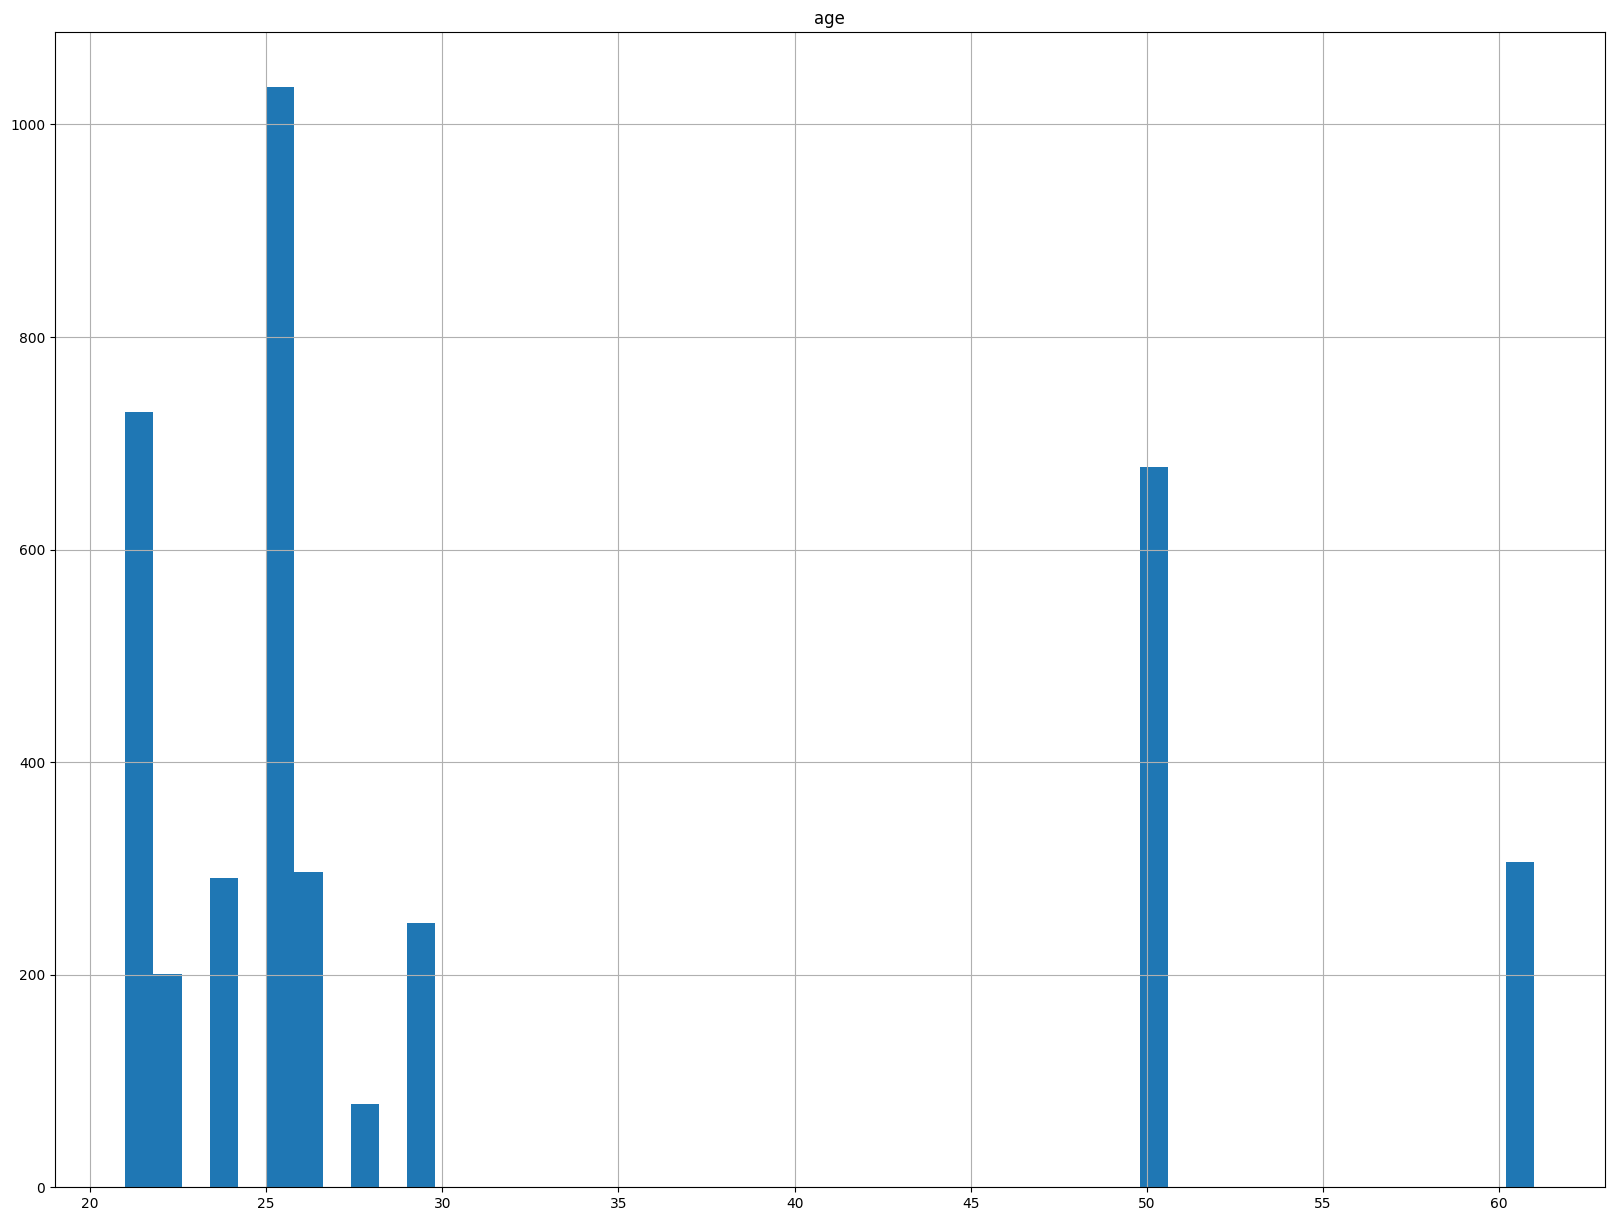

In [9]:
df1_english.hist(bins=50, figsize=(20,15))
plt.show()

Hago una selección de únicamemente las contranarrativas (para armar el ránking que consiste en contranarrativas exclusivamente).

In [10]:
# Selecciono la columna de contranarrativas
counternarratives_conan = df1_english[['counterSpeech']]

In [11]:
# Selecciono la columna de discursos de odio
hate_speech_conan = df1_english[['hateSpeech']]

In [12]:
hate_speech_conan

,hateSpeech
0,"According to a recent OFSTED report, a school ..."
1,In Birmingham there is a school where girls an...
2,A school in Birningham is still separating gir...
3,"According to a recent OFSTED report, a school ..."
4,In Birmingham there is a school where girls an...
...,...
3859,Women of our culture that decide to become Isl...
3860,White women converted to Islam are the saddest...
3861,Those White women converting to Islam are the ...
3862,Women of our culture that decide to become Isl...


In [13]:
# Removes duplicates from a list preserving order:
def removeDuplicatesFromList(l):
  return list(dict.fromkeys(l).keys())

In [14]:
# Transforms a DataFrame to a list preserving order:
def dataFrameToList(df):
  return list(df.values.flatten())

In [15]:
counternarratives_conan_list_sin_repetidos = removeDuplicatesFromList(list(counternarratives_conan.values.flatten()));

In [16]:
hate_speech_conan_list_sin_repetidos = removeDuplicatesFromList(dataFrameToList(hate_speech_conan));

In [17]:
#Veo cuántos elementos tiene counternarratives_conan_list eliminado repetidos.
len(counternarratives_conan_list_sin_repetidos)

1270

In [18]:
#Veo cuántos elementos tiene hate_speech_conan_list_sin_repetidos eliminado repetidos.
len(hate_speech_conan_list_sin_repetidos)

408

In [20]:
def get_random_elements(input_list: List[int], n: int) -> List[int]:
    """
    Selects n unique random elements from the input list.

    Args:
    input_list (List[int]): The list from which to select elements.
    n (int): The number of elements to select.

    Returns:
    List[int]: A list containing n unique random elements from the input list.

    Raises:
    ValueError: If n is greater than the length of the input list.
    """
    if n > len(input_list):
        raise ValueError("n cannot be greater than the length of the input list")

    return random.sample(input_list, n)

In [22]:
# Defie set HS of hate speeches that will be given to every annotator.
random.seed(42)
hs_set_to_be_given_to_every_annotator = get_random_elements(hate_speech_conan_list_sin_repetidos, SIZE_OF_HS)

In [23]:
hs_set_to_be_given_to_every_annotator

['If Muslims counteracted child rapists in their communities instead of engaging in public discussions about Islam, one day Islam indeed would become a peaceful religion.',
 'It is time for us to take Islam for what it is. A murderous cult that should be exterminated, and that is the end of it.',
 'Fuck Islam and Fuck ISIS. We should repatriate all Muslims. They are all a bunch of violent criminals who do not share our values and never will. Without them Britain will be a better, safer place.',
 'Muslims are two-faced, have you ever seen a Muslim protest against Isis or Saudi human right abuses?',
 "Islam members are constantly repeating that Islam is a 'religion of peace' more than other persons belonging to other religion do. I do not understand why Muslims need to repeat this thing so many times?",
 'Islam is a religion mostly based on conquest and violence.',
 'We must not believe the liberal and political elite. Islam is no good, its complete evil, and an ideology of war and it wa

In [52]:
def filter_hate_speech(df: pd.DataFrame, hs_terms: List[str]) -> pd.DataFrame:
    """
    Filters the DataFrame to keep only the rows where the hateSpeech column contains any of the hs_terms.

    Args:
    df (pd.DataFrame): The input DataFrame with a 'hateSpeech' column.
    hs_terms (List[str]): A list of strings representing hate speech terms to filter by.

    Returns:
    pd.DataFrame: A new DataFrame containing only the rows where the hateSpeech column contains any of the hs_terms.
    """
    # Filter the DataFrame
    filtered_df = df[df['hateSpeech'].apply(lambda x: any(x == term for term in hs_terms))]

    return filtered_df



In [53]:
# Filter the English DataFrame to keep only the rows where the 'hateSpeech' column contains any of the terms
# from the hs_set_to_be_given_to_every_annotator set, creating a new DataFrame filtered_df1_english.

filtered_df1_english = filter_hate_speech(df1_english, hs_set_to_be_given_to_every_annotator)
filtered_df1_english

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
72,ENT1ST0001HS0092CN000001,Fuck Islam and Fuck ISIS. We should repatriate...,Are you blaming all community for the action o...,Islamophobia,crimes,denouncing,26.0,female,Bachelor
75,ENT1ST0001HS0092CN000002,Fuck Islam and Fuck ISIS. We should repatriate...,Could you mind your language? You are insultin...,Islamophobia,crimes,denouncing,24.0,female,Bachelor
78,ENT1ST0001HS0092CN000003,Fuck Islam and Fuck ISIS. We should repatriate...,The truth is the worldwide Muslims denounce IS...,Islamophobia,crimes,facts,29.0,female,Master
81,ENT1ST0001HS0092CN000004,Fuck Islam and Fuck ISIS. We should repatriate...,Positive news stories*.,Islamophobia,crimes,other,25.0,male,Master
84,ENT1ST0001HS0092CN000005,Fuck Islam and Fuck ISIS. We should repatriate...,Surely it is our 'actions' that make us crimin...,Islamophobia,crimes,facts,61.0,male,Bachelor
...,...,...,...,...,...,...,...,...,...
3559,ENT1ST0022HS0014CN001242P1,"Muslims are two-faced, have you ever seen a Mu...",Because the act of one person or group is not ...,Islamophobia,terrorism,facts,25.0,male,Master
3562,ENT1ST0022HS0014CN001243P1,"Muslims are two-faced, have you ever seen a Mu...","Yes, we do.",Islamophobia,terrorism,facts,22.0,female,Master
3565,ENT1ST0022HS0014CN001244P1,"Muslims are two-faced, have you ever seen a Mu...",There are many examples of Muslims protesting ...,Islamophobia,terrorism,facts,22.0,female,Master
3568,ENT1ST0022HS0014CN001245P1,"Muslims are two-faced, have you ever seen a Mu...",A simple google search of this will illustrate...,Islamophobia,terrorism,facts,25.0,male,Master


In [26]:
filtered_df1_english.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 72 to 3571
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cn_id           63 non-null     object 
 1   hateSpeech      63 non-null     object 
 2   counterSpeech   63 non-null     object 
 3   hsType          63 non-null     object 
 4   hsSubType       63 non-null     object 
 5   cnType          63 non-null     object 
 6   age             63 non-null     float64
 7   gender          63 non-null     object 
 8   educationLevel  63 non-null     object 
dtypes: float64(1), object(8)
memory usage: 4.9+ KB


In [28]:
# Select only the counterSpeech column
filtered_counternarratives_conan = filtered_df1_english[['counterSpeech']]

In [30]:
# Transform the resulting dataframe in a list without repetitions.
# This is the set CN, according to the annotation manual.
filtered_counternarratives_conan_list_without_repetitions = removeDuplicatesFromList(dataFrameToList(filtered_counternarratives_conan));

In [31]:
def partition_list(input_list: List[str], n: int, seed: int = 42) -> List[List[str]]:
    """
    Partition a list of strings into n partitions of approximately the same size.

    Args:
        input_list (List[str]): The list of strings to partition.
        n (int): The number of partitions to create.
        seed (int): The seed for the random number generator to shuffle the list.

    Returns:
        List[List[str]]: A list containing n partitions, each of which is a list of strings.
    """
    # Shuffle the input list with the provided seed
    random.seed(seed)
    random.shuffle(input_list)

    # Initialize a list of empty lists to hold the partitions
    partitions = [[] for _ in range(n)]

    # Distribute the elements of the input list into the partitions
    for i, item in enumerate(input_list):
        partitions[i % n].append(item)

    return partitions

In [33]:
def extract_percentage(input_list, extraction_percentage = 0.1, seed: int = 42):
    """
    Extracts extraction_percentage percent of elements from the input list.

    Args:
        input_list (list): The input list of elements.
        extraction_percentage (float): The percentage of elements to extract.

    Returns:
        tuple: A tuple containing two lists - the extracted elements and the remaining elements.
    """
    # Shuffle the input list with the provided seed
    random.seed(seed)
    random.shuffle(input_list)
    print("extraction_percentage", extraction_percentage)
    num_to_extract = math.ceil(len(input_list) * extraction_percentage)
    print("num_to_extract", num_to_extract)
    print("len(input_list)",len(input_list))
    extracted_elements = input_list[:num_to_extract]
    remaining_elements = [item for item in input_list if item not in extracted_elements]
    return extracted_elements, remaining_elements

In [34]:
# Example usage:
input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
overlap_percentage = 0.3
extracted, remaining = extract_percentage(input_list, overlap_percentage)
print("Extracted elements:", extracted)
print("Remaining elements:", remaining)

extraction_percentage 0.3
num_to_extract 3
len(input_list) 10
Extracted elements: ['h', 'd', 'c']
Remaining elements: ['i', 'f', 'g', 'j', 'e', 'a', 'b']


In [35]:
def insert_elements_into_pairs(list_of_lists: List[List[str]], elements: List[str], n: int, seed: int = 42):
    """
    Shuffle a list elements.
    Let P be pairs of sublists of list_of_lists, insert n elements of the list elements in each sublist of P.

    Args:
        list_of_lists (List[List[str]]): List of lists to insert elements into.
        elements (List[str]): List of elements to insert.
        n (int): Number of elements to insert into each pair of lists.
    """
    # Shuffle the elements list
    random.seed(seed)
    random.shuffle(elements)

    # Make a copy of the imput list_of_list
    output_list_of_list = list_of_lists

    # Iterate over output_list_of_list in pairs
    for i in range(0, len(output_list_of_list), 2):
        # Insert elements into consecutive lists
        for j in range(i, min(i + 2, len(output_list_of_list))):
            output_list_of_list[j].extend(elements[:n])
        elements = elements[n:]
    return output_list_of_list

In [ ]:
# Example usage:
LL = [[1,2,3] for _ in range(7)]  # Four lists [1,2,3]
elements = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]  # Example elements
n = 2  # Insert two elements into each pair of lists
extended_LL = insert_elements_into_pairs(LL, elements, n)
print(extended_LL)

[[1, 2, 3, 'h', 'f'], [1, 2, 3, 'h', 'f'], [1, 2, 3, 'c', 'i'], [1, 2, 3, 'c', 'i'], [1, 2, 3, 'j', 'g'], [1, 2, 3, 'j', 'g'], [1, 2, 3, 'l', 'd']]


In [36]:
def overlapping_partitions(input_list: List[str], number_of_annotators: int, overlap_percentage_per_pair_of_annotators: float = 0.1) -> List[List[str]]:
    """
    Generates n subsets of input_list.

    Every pair of subsets has a overlap_percentage_per_pair_of_annotators overlap, and are disjoint for the rest.

    Args:
        input_list (List[str]): List of contranarratives.
        number_of_annotators (int): Number of annotators.

    Returns:
        List[List[str]]: List of n subsets of contranarratives as described above.
    """
    number_of_overlapped_examples_total = len(input_list) * overlap_percentage_per_pair_of_annotators

    overlapping_list, non_overlapping_list = extract_percentage(input_list, overlap_percentage_per_pair_of_annotators)
    print("overlapping_list", overlapping_list)
    print("len_overlapping_list", len(overlapping_list))
    print("len_non_overlapping_list", len(non_overlapping_list))

    number_of_overlapping_elements_per_pair_of_annotators = max(1,(len(overlapping_list)//number_of_annotators)*2)
    print("number_of_overlapping_elements_per_pair_of_annotators", number_of_overlapping_elements_per_pair_of_annotators)

    partitions_for_each_annoatator_without_overlap = partition_list(non_overlapping_list, number_of_annotators)
    print("partitions_for_each_annoatator_without_overlap", partitions_for_each_annoatator_without_overlap)

    partitions_for_each_annoator_with_overalp = insert_elements_into_pairs(partitions_for_each_annoatator_without_overlap, overlapping_list, number_of_overlapping_elements_per_pair_of_annotators)
    print("partitions_for_each_annoator_with_overalp",partitions_for_each_annoator_with_overalp)

    return partitions_for_each_annoator_with_overalp

In [37]:
# overlapping_partitions is a list of lists with CN' for each annotator.
# Where CN' is a subset of the set CN.
# Every CN' shares overlap_percentage percentage of counternarratives
# with another CN'' and is disjoint with the rest.


list_of_counternarratives_for_each_annotator = overlapping_partitions(filtered_counternarratives_conan_list_without_repetitions, NUMBER_OF_ANNOTATORS, 0.2)


extraction_percentage 0.2
num_to_extract 13
len(input_list) 62
overlapping_list ['Many victims of terror are Muslim.', "Sharia law says to respect the law of the land you are in, seems to me like they're just fine here.", 'What Islam truely is is a religion criticizes violence and encourages love among people. Even British people might commit crimes. Extermination is the same action as crime. We should think of a better way to combat crime and hate wordly.', "This feels like a 'Final solution' to me. Are you seriously suggesting the extermination of, what, 5% of the UK population? Get a grip.", 'This is not true. How can you say this about an entire faith? Just hatred.', 'I agree that ISIS is an evil aberration, but to extend this to include up to 3 million people just in the UK is just plain silly.', 'There are criminals, who are from UK, raping children and murdering people. Maybe it better we should first focus on these cases and think how we could decrease the number of crimes.', '

In [38]:
list_of_counternarratives_for_each_annotator

[['There is already work going within Muslim communities, just as there is across the rest of society, it is just not reported on.',
  'How is the action of an individual or group representative of an entire faith?',
  'Religion is an integral part of our society, surely it is a good thing that it preaches peace.',
  'So you are saying an entire faith of 1.6 billion is not peaceful? This is ignorant.',
  'This is not true. Let me cite a verse in Quran for you. "muslims cannot preemptively initiate a war." [quote from Quran about peace].',
  'Muslims many times have shown how supportive they are of other communities. It does not sound to me that they want to fight against us and start a war?',
  'So are we forgetting about the Crusades then.',
  'There are criminals, who are from UK, raping children and murdering people. Maybe it better we should first focus on these cases and think how we could decrease the number of crimes.'],
 ['Actually, the principle of Muslims is to love and respe

# Tests

In [39]:
# Function to be tested
def removeDuplicatesFromList(l):
    return list(dict.fromkeys(l).keys())

# Test suite
class TestRemoveDuplicatesFromList(unittest.TestCase):

    def test_empty_list(self):
        self.assertEqual(removeDuplicatesFromList([]), [])

    def test_no_duplicates(self):
        self.assertEqual(removeDuplicatesFromList([1, 2, 3, 4]), [1, 2, 3, 4])

    def test_all_duplicates(self):
        self.assertEqual(removeDuplicatesFromList([1, 1, 1, 1]), [1])

    def test_some_duplicates(self):
        self.assertEqual(removeDuplicatesFromList([1, 2, 2, 3, 4, 4, 5]), [1, 2, 3, 4, 5])

    def test_duplicates_with_different_types(self):
        self.assertEqual(removeDuplicatesFromList([1, 'a', 'a', 1, 2.0, 2.0]), [1, 'a', 2.0])

    def test_duplicates_with_none(self):
        self.assertEqual(removeDuplicatesFromList([None, None, 1, 2, None, 3]), [None, 1, 2, 3])

    def test_preserve_order(self):
        self.assertEqual(removeDuplicatesFromList([3, 1, 2, 3, 4, 2, 5]), [3, 1, 2, 4, 5])

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.......
----------------------------------------------------------------------
Ran 7 tests in 0.014s

OK


In [44]:
# Function to be tested
def dataFrameToList(df):
    return list(df.values.flatten())

# Test suite
class TestDataFrameToList(unittest.TestCase):

    def test_empty_dataframe(self):
        df = pd.DataFrame()
        self.assertEqual(dataFrameToList(df), [])

    def test_single_row_dataframe(self):
        df = pd.DataFrame({'A': [1], 'B': [2], 'C': [3]})
        self.assertEqual(dataFrameToList(df), [1, 2, 3])

    def test_single_column_dataframe(self):
        df = pd.DataFrame({'A': [1, 2, 3]})
        self.assertEqual(dataFrameToList(df), [1, 2, 3])

    def test_multiple_rows_and_columns(self):
        df = pd.DataFrame({'A': [1, 2], 'B': [3, 4], 'C': [5, 6]})
        self.assertEqual(dataFrameToList(df), [1, 3, 5, 2, 4, 6])

    def test_preserve_order(self):
        df = pd.DataFrame({'A': [5, 4], 'B': [3, 2], 'C': [1, 0]})
        self.assertEqual(dataFrameToList(df), [5, 3, 1, 4, 2, 0])

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


............
----------------------------------------------------------------------
Ran 12 tests in 0.025s

OK


In [45]:
# Test suite
class TestGetRandomElements(unittest.TestCase):

    def setUp(self):
        # Set a seed for reproducibility
        random.seed(42)
        self.input_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    def test_select_n_elements(self):
        result = get_random_elements(self.input_list, 3)
        self.assertEqual(len(result), 3)
        self.assertTrue(all(elem in self.input_list for elem in result))

    def test_unique_elements(self):
        result = get_random_elements(self.input_list, 5)
        self.assertEqual(len(result), len(set(result)))

    def test_n_greater_than_list_length(self):
        with self.assertRaises(ValueError):
            get_random_elements(self.input_list, 11)

    def test_empty_list(self):
        with self.assertRaises(ValueError):
            get_random_elements([], 1)

    def test_exact_list_length(self):
        result = get_random_elements(self.input_list, len(self.input_list))
        self.assertEqual(sorted(result), sorted(self.input_list))

    def test_deterministic_output(self):
        result = get_random_elements(self.input_list, 3)
        expected_result = [2, 1, 5]  # This is based on the seed value of 42
        self.assertEqual(result, expected_result)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..................
----------------------------------------------------------------------
Ran 18 tests in 0.068s

OK


In [80]:
# Test suite
class TestFilterHateSpeech(unittest.TestCase):

    def setUp(self):
        self.df = pd.DataFrame({
            'hateSpeech': [
                'This is a hate speech',
                'This is not a hate speech',
                'Another hateful remark',
                'No hate here',
                'A totally neutral statement'
            ],
            'otherColumn': [1, 2, 3, 4, 5]
        })
        self.hs_terms = ['hate', 'hateful']
        self.hs_terms_match = ['This is a hate speech', 'Another hateful remark']

    def test_empty_dataframe(self):
        df = pd.DataFrame(columns=['hateSpeech', 'otherColumn'])
        result = filter_hate_speech(df, self.hs_terms)
        self.assertTrue(result.empty)

    def test_no_hatespeech_column(self):
        df = pd.DataFrame({'otherColumn': [1, 2, 3, 4, 5]})
        with self.assertRaises(KeyError):
            filter_hate_speech(df, self.hs_terms)

    def test_no_match(self):
        df = pd.DataFrame({
            'hateSpeech': ['No match here', 'Still no match', 'Nothing to see'],
            'otherColumn': [1, 2, 3]
        })
        result = filter_hate_speech(df, self.hs_terms)
        self.assertTrue(result.empty)

    def test_all_match(self):
        df = pd.DataFrame({
            'hateSpeech': ['hate', 'hateful'],
            'otherColumn': [1, 2]
        })
        result = filter_hate_speech(df, self.hs_terms)
        self.assertEqual(len(result), 2)

    def test_some_match(self):
        result = filter_hate_speech(self.df, self.hs_terms_match)
        expected = self.df.iloc[[0, 2]]
        pd.testing.assert_frame_equal(result.reset_index(drop=True), expected.reset_index(drop=True))

    def test_pattern_with_special_characters(self):
        hs_terms = ['hate$', '^hateful']
        df = pd.DataFrame({
            'hateSpeech': ['hate$', '^hateful', 'not hate', 'random text', 'HATEFUL'],
            'otherColumn': [1, 2, 3, 4, 5]
        })
        result = filter_hate_speech(df, hs_terms)
        expected = df.iloc[[0, 1]]
        pd.testing.assert_frame_equal(result.reset_index(drop=True), expected.reset_index(drop=True))

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.........................
----------------------------------------------------------------------
Ran 25 tests in 0.077s

OK


In [107]:
class TestPartitionList(unittest.TestCase):

    def test_equal_partition_sizes(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        n = 3
        partitions = partition_list(input_list, n)
        self.assertEqual(len(partitions), n)
        partition_sizes = [len(partition) for partition in partitions]
        self.assertTrue(all(size == len(input_list) // n for size in partition_sizes))

    def test_equal_partitions_but_the_first_partition_has_one_extra_element(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
        n = 3
        partitions = partition_list(input_list, n)
        self.assertEqual(len(partitions), n)
        partition_sizes = [len(partition) for partition in partitions]
        self.assertTrue(len(input_list) // n + 1 == partition_sizes[0]) # The first partition has one more element
        self.assertTrue(all(size == len(input_list) // n for size in (partition_sizes[1:]))) # The rest of the partitions have the same number of elements

    def test_equal_partitions_but_the_first_two_partition_have_one_extra_element(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k"]
        n = 3
        partitions = partition_list(input_list, n)
        self.assertEqual(len(partitions), n)
        partition_sizes = [len(partition) for partition in partitions]
        self.assertTrue(all(size == len(input_list) // n + 1 for size in (partition_sizes[:-1]))) # The all the partitons but the lasthave the same number of elements
        self.assertTrue(len(input_list) // n == partition_sizes[-1]) # The last partition has one more element

    def test_empty_input_list(self):
        input_list = []
        n = 3
        partitions = partition_list(input_list, n)
        self.assertEqual(len(partitions), n)
        self.assertTrue(all(len(partition) == 0 for partition in partitions))

    def test_single_partition(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
        n = 1
        partitions = partition_list(input_list, n)
        self.assertEqual(len(partitions), n)
        self.assertEqual(partitions[0], input_list)

# Run the tests
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..............................
----------------------------------------------------------------------
Ran 30 tests in 0.067s

OK


## Pseudo tests for overlapping_partitions (fixme: transform in actual tests)

In [ ]:
len(list_of_counternarratives_for_each_annotator) == NUMBER_OF_ANNOTATORS

True

In [ ]:
list_of_counternarratives_for_each_annotator[0]

["If it is then it certainly hasn't been a religion of 'conquest' quite as successfully as some others. What about Christianity and colonialism?",
 'That is not true. Most of immigrants, inculding Muslims, in UK contribut themselves more than and receive less than they should.',
 'If you dislike diversity so much, why do not you go off and live in a country where there are no Muslims, only people like you?',
 "The truth is the worldwide Muslims denounce ISIS and its violence. Plus, many Muslims are the victims of ISIS. According to <The Guardian>, 'Isis regularly publishes a hit-list of global Muslim leaders in its online magazine, which certainly helps to explain why Muslims from Syria and Iraq may want to migrate to countries like Australia.'.",
 'So you are saying an entire faith of 1.6 billion is not peaceful? This is ignorant.',
 'Have you heard about the Arab Counter-Terrorism Coalition?',
 'Muslims criticize violence and terrorism as well. They even became victims of ISIS after 

In [ ]:
list_of_counternarratives_for_each_annotator[1]

['Muslims many times have shown how supportive they are of other communities. It does not sound to me that they want to fight against us and start a war?',
 'No. This is not true. How can you say this about an entire faith?',
 "Are you blaming all community for the action of a few? Doesn't seem very fair does it?",
 'Because the act of one person or group is not reflective of an entire faith.',
 'Why would it? Why such hatred towards an entire faith?',
 'My optician seems like a nice fellow, so I wonder why you think he is likley to kick off at a moments notice.',
 'Saying that all Muslims are criminals is just wrong. They also do share British values.']

In [61]:
import unittest

def overlapping_partitions(input_list, number_of_annotators, overlap_percentage):
    # Your function implementation goes here
    pass

class TestOverlappingPartitions(unittest.TestCase):
    def test_overlapping_partitions(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p"]
        number_of_annotators = 3
        overlap_percentage = 0.1
        expected_partitions = [
            [["a", "b", "c", "d", "e"], ["k", "l", "m", "n", "o"]],
            [["f", "g", "h", "i", "j"], ["c", "d", "e", "f", "g"]],
            [["h", "i", "j", "k", "l"], ["o", "p", "a", "b", "c"]]
        ]

        result = overlapping_partitions(input_list, number_of_annotators, overlap_percentage)
    """
        self.assertEqual(len(result), number_of_annotators)
        for partition, expected_partition in zip(result, expected_partitions):
            self.assertEqual(partition, expected_partition)

    def test_empty_input_list(self):
        input_list = []
        number_of_annotators = 5
        overlap_percentage = 0.1

        result = overlapping_partitions(input_list, number_of_annotators, overlap_percentage)

        self.assertEqual(len(result), number_of_annotators)
        for partition in result:
            self.assertEqual(partition, [])

    def test_overlap_percentage_0(self):
        input_list = ["a", "b", "c", "d", "e", "f", "g", "h"]
        number_of_annotators = 2
        overlap_percentage = 0

        result = overlapping_partitions(input_list, number_of_annotators, overlap_percentage)

        self.assertEqual(len(result), number_of_annotators)
        for partition in result:
            self.assertTrue(len(partition) <= len(input_list) / number_of_annotators)
    """
if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


...................
----------------------------------------------------------------------
Ran 19 tests in 0.101s

OK
